# Introduction to Keras

## What is Keras?
Keras is a deep-learning framework that provides a convenient way to define and train almost any kind of deep-learning model. It is written in Python and can be run on top of TensorFlow, CNTK, or Theano. You are free to use it in commercial projects since it is distributed under the MIT license. One of the most important characteristics of Keras is its user-friendly API. You could develop a state of art deep learning model in no time.

## The Model class

The core data structure of Keras is the Model class. It is found under keras.models that gives you two ways to define models: The Sequential class and the Model class. The Sequential class builds the network layer by layer in a sequential order. The Model class allows for more complex network structures. In this exercise you will use the Sequential class.

# Setup

We start with importing all packages we will need.

In [6]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Import keras modules
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import random_normal
import tensorflow as tf
import keras as keras

print('keras version:', keras.__version__)
print('tensorflow version:', tf.__version__)

2024-01-07 11:41:16.143805: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-07 11:41:16.209589: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 11:41:16.209670: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 11:41:16.209765: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 11:41:16.240314: I tensorflow/core/platform/cpu_feature_g

keras version: 2.14.0
tensorflow version: 2.14.0


# Load the data

The `make_moons()` method is used to generate data with a bit of noise.
Divide this data into the train and test sets.
[Documentation on make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

Look [here](https://scikit-learn.org/stable/modules/classes.html#) for the correct function to split the data.

In [7]:
np.random.seed(0)
X, Y = make_moons(500, noise=0.2)

# TODO divide the data in train and test sets
# Use test_size=0.2
X_train, X_test, Y_train, Y_test =

SyntaxError: invalid syntax (753493339.py, line 5)

Let's create a [Mathplotlib Scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to visualize the generated training data.

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=40, cmap=plt.cm.Spectral)

Let's create a second [Mathplotlib Scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to visualize the generated test data.

In [ ]:
# Insert your code here.

You can also compare it with the complete (undivided) generate data set.

In [8]:
# Insert your code here.

Inspect a few data points to get some insights into the generated data.
The X data points will be the input of the neural network.
The Y data points is the expected output.

In [4]:
print(X[0:5]) # print the first 5 elements in X
print()
print(Y[0:5]) # print the first 5 elements in Y

NameError: name 'X' is not defined

Inspect the train and test data points.

In [5]:
# Insert your code here.

## Define Keras Model

Here is a schematic representation of the methods in the Model class we will use.

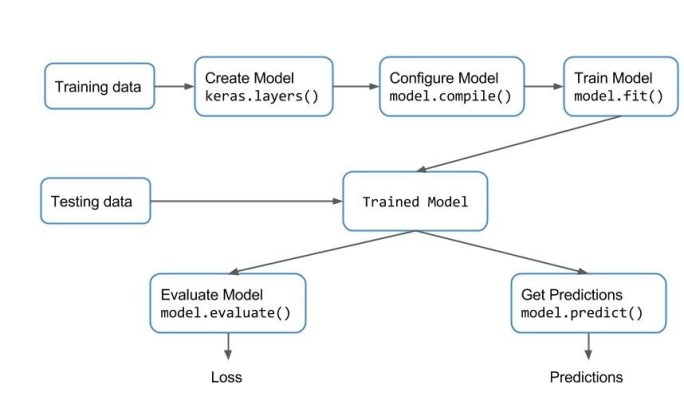

Define the number of input nodes (input_dim) and the number of output node (output_dim).


In [ ]:
input_dim = 0 # SET CORRECT VALUE
output_dim = 0 # SET CORRECT VALUE

We create a Sequential model and add layers one at a time until we are happy with our network architecture.
You start off with one hidden layer. In the hidden layer(s) you use a ReLU activation function. In the output layer you use a sigmoid activation function.
Documentation on the Dense layers you add to the model can be found [here](https://keras.io/api/layers/core_layers/dense/).
Use 32 as the amount of units.

In [ ]:
model = Sequential()
model.add(#FIRST LAYER HERE)
model.add(#HIDDEN LAYER HERE)
model.add(#OUTPUT LAYER HERE)

Here is a short summary of the network you created.

In [ ]:
model.summary()

Next step is to `compile` the model you created.
Documentation on the compile method can be found [here](https://keras.io/api/models/model_training_apis/).

Use the following configuration
1.   loss: 'binary_crossentropy'
2.   optimizer: 'sgd'
3.   metrics: ['accuracy']



In [ ]:
# compile the model you created

Now it's time to train the model for a fixed number of 300 epochs. Find out how the `fit()` method works.

In [ ]:
hist = # train the model

Use the following code to plot the progress of accurarcy and loss while training the model.

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['loss'], label='Loss')
plt.legend(loc='best')
plt.title('Training Accuracy and Loss')
plt.show()

Lookup the `evaluate()` function in the [documentation](https://keras.io/api/models/model_training_apis/) so you can use it to calculate the loss and accuracy of your model on the test set.

In [ ]:
# calculate loss and accuracy of you model on the test set

With the function `plot_decision_boundary()` you can visualize the decision boundary that the model learned.

The decision boundary indicates how to decide to which class each data point belongs.

In [ ]:
def plot_decision_boundary(prediction_model, X, Y):
    # Plot the decision boundary
    # Determine grid range in x and y directions
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    # Set grid spacing parameter
    spacing = min(x_max - x_min, y_max - y_min) / 100

    # Create grid
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                   np.arange(y_min, y_max, spacing))

    # Concatenate data to match input
    data = np.hstack((XX.ravel().reshape(-1,1),
                      YY.ravel().reshape(-1,1)))
    # Get decision boundary probabilities
    db_prob = prediction_model.predict(data)

    # Convert probabilities to classes
    clf = np.where(db_prob<0.5,0,1)

    Z = clf.reshape(XX.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(XX, YY, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=Y,
                cmap=plt.cm.Spectral)
    plt.show()

In [ ]:
plot_decision_boundary(model, X, Y)